In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imresize
from imageio import imread
import shutil
import pandas as pd
import pickle
from tqdm import tqdm_notebook, tqdm
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
# rcParams['figure.figsize']=10,10
import sys
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import cv2
%matplotlib inline

In [10]:
with open('data/x_test.pickle', 'rb') as f:
    x_test=np.array(pickle.load(f))
with open('data/y_test.pickle', 'rb') as f:
    y_test=np.array(pickle.load(f))

In [11]:
x_test

array(['6e81892db1569782724a0234e610868a.png',
       '0bcfc5a4d920dcced672ad82fa136875.png',
       'c26d812059636151e2d7264fa0a9fdbc.png',
       '0c6bdc9e7cc22fdd4266e39e58fd87be.png',
       '5aced0ab3e06a9428cf54767cd5b8df6.png',
       '3fc5e991d9d67ade69e95d8422b8b694.png',
       '4a46f53037b474194327f458ac83d5ad.png',
       '1bd0022f266d1a671a126e565318e12a.png',
       '5f2c3de190f1e231fbb68d64eae7badc.png',
       'b4d425eedb47b3d886ca70d56db4120d.png',
       '0bd52690187d601455f5b83670fe019f.png',
       '0e672b307e510b033d601b4901ca9a4c.png',
       '0ce3e0b2cb776b958bb763f0ba8c46f9.png',
       '3ee46c9946fd48e2cdf159e0dd42dd38.png',
       'd8edc14c38478d80b27a0bc6d41dc4ae.png',
       'b318ed71fdddcabf17e15c6ca3af13af.png',
       '4a28995506ac48854eb426a5e06c12d0.png',
       '6d33f983240a4a474d51cd32d05e918d.png',
       '2fbab30ef74dd450672d2a9d3142b459.png',
       '4fbf3c5ad32f5e222ed1953316ce0d51.png',
       'a3978283d13463af3d6d98c6ae6d6be7.png',
       'afe58

In [9]:
y_test

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


In [12]:
x_test_pristine=x_test[y_test==0]
x_test_fake=x_test[y_test==1]

In [14]:
len(x_test_fake)

90

In [8]:
x_test_fake = np.load('k64 binary 25percent stride8/sample_fakes_np_test.npy')

In [9]:
len(x_test_fake)

51109

In [10]:
with open('data/x_test.pickle', 'rb') as f:
    x_test=np.array(pickle.load(f))

with open('data/y_test.pickle', 'rb') as f:
    y_test=np.array(pickle.load(f))

In [11]:
x_test_pristine_names=x_test[y_test==0]

In [20]:
def sample_random(img, num_samples, stride=8):
    kernel_size=64
    
    x_start=0
    y_start=0
    samples=[]
    
    for y_start in range(0, img.shape[0] - kernel_size + 1, stride):
        for x_start in range(0, img.shape[1] - kernel_size + 1, stride):

            #c_255 = count_255(mask[y_start:y_start + kernel_size, x_start:x_start + kernel_size])

            #if (c_255 > threshold) and (kernel_size * kernel_size - c_255 > threshold):
            samples.append(img[y_start:y_start + kernel_size, x_start:x_start + kernel_size, :3])

    
    indices=np.random.randint(0, len(samples), min(len(samples), num_samples))
    
    sampled=[]
    for i in indices:
        sampled.append(samples[i])
    
    return sampled

In [13]:
len(x_test_pristine_names)

205

In [14]:
len(x_test_fake)/len(x_test_pristine_names)

249.31219512195122

249 samples per pristine image

In [15]:
249*205

51045

In [16]:
fake_path = 'dataset-dist/phase-01/training/fake/'
pristine_path = 'dataset-dist/phase-01/training/pristine/'
mask_path = fake_path + 'masks/'

In [18]:
x_test_pristine = []
for img_name in x_test_pristine_names:
    if os.path.isfile(pristine_path + img_name):
        pristine_img = imread(pristine_path + img_name)


        x_test_pristine.append(pristine_img[:, :, :3])

In [21]:
samples_pristine_binary=np.ndarray(shape=(51045, 64, 64, 3), dtype=np.dtype('uint8'))

i=0
for pristine_img in x_test_pristine:
    
    samples=sample_random(pristine_img, 249)
    for j, sample in enumerate(samples):
        samples_pristine_binary[i, :, :, :]=sample
        i+=1
print(i)

51045


In [22]:
np.save('samples_pristine_test.npy', samples_pristine_binary)

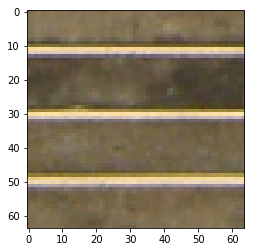

In [37]:
plt.imshow(samples_pristine_binary[13])

In [39]:
x_test_fake.shape

(51109, 64, 64, 3)

In [40]:
x_test=np.concatenate((x_test_fake, samples_pristine_binary), axis=0)

In [41]:
x_test.shape

(102154, 64, 64, 3)

In [42]:
np.save('x_test.npy', x_test)

In [43]:
y_test=np.array([1]*len(x_test_fake)+[0]*len(samples_pristine_binary))

In [44]:
np.save('y_test.npy', y_test)